# cookie_cats Project

>> Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level.

>> As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.

>>**But where should the gates be placed? Initially, the first gate was placed at level 30, but in this notebook, we're going to analyze an AB-test where we moved the first gate in Cookie Cats from level 30 to level 40. In particular, we will look at the impact on player retention. But before we get to that, a key step before undertaking any analysis is understanding the data.**

## Importing my libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random 
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

## Reading my data

In [2]:
df1 = pd.read_csv('cookie_cats.csv')
df = df1.copy()
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### Assessment and clean part

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.replace({False : 0, True : 1}, inplace = True)

## Test part

In [6]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [7]:
print('The number of players is',df['userid'].nunique())

The number of players is 90189


In [8]:
print('The rate of players that come back and play 1 day after installing',df.retention_1.mean())
print('The rate of players that come back and play 7 day after installing',df.retention_7.mean())

The rate of players that come back and play 1 day after installing 0.4452095044850259
The rate of players that come back and play 7 day after installing 0.1860648194347426


In [9]:
df_retention = df.groupby('version').agg({'userid': 'count','sum_gamerounds':"sum", 'retention_1':"mean", 'retention_7':"mean"})
df_retention

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,2344795,0.448188,0.190201
gate_40,45489,2333530,0.442283,0.182000


In [10]:
boot1 = []
for i in range(1000):
    diffs = df.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()
    boot1.append(diffs)

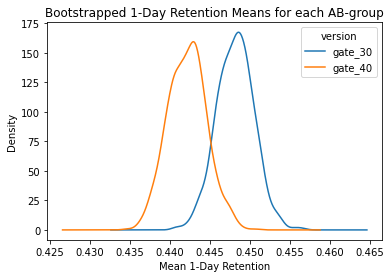

In [11]:
boot1 = pd.DataFrame(boot1)
boot1.plot.kde()
plt.title('Bootstrapped 1-Day Retention Means for each AB-group')
plt.xlabel('Mean 1-Day Retention');

In [12]:
boot1.head()

version,gate_30,gate_40
retention_1,0.449058,0.442581
retention_1,0.447245,0.442690
retention_1,0.447528,0.439473
retention_1,0.451445,0.442195
retention_1,0.449734,0.444956


In [13]:
boot1['diffs'] = (boot1['gate_40'] - boot1['gate_30'])*100

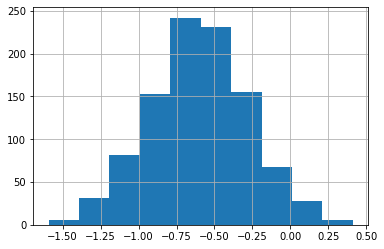

In [14]:
boot1['diffs'].hist()

In [15]:
(boot1['diffs']< 0).mean()

0.961

In [16]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [17]:
boot_7d = []
for x in range(1000):
    d = df.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()
    boot_7d.append(d)

In [18]:
boot_7d = pd.DataFrame(boot_7d)
boot_7d.head()

version,gate_30,gate_40
retention_7,0.190132,0.179580
retention_7,0.189868,0.180639
retention_7,0.194198,0.179160
retention_7,0.191544,0.185239
retention_7,0.188822,0.182285


Text(0.5, 0, 'The mean retention_7')

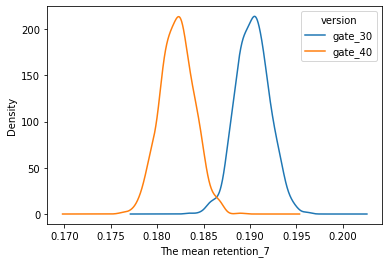

In [19]:
boot_7d.plot.kde()
plt.xlabel('The mean retention_7')

In [20]:
boot_7d['diffs'] = (boot_7d['gate_40'] - boot_7d['gate_30'])*100
boot_7d

version,gate_30,gate_40,diffs
retention_7,0.190132,0.179580,-1.055147
retention_7,0.189868,0.180639,-0.922928
retention_7,0.194198,0.179160,-1.503835
retention_7,0.191544,0.185239,-0.630541
retention_7,0.188822,0.182285,-0.653753
...,...,...,...
retention_7,0.190739,0.181321,-0.941868
retention_7,0.190538,0.183930,-0.660815
retention_7,0.189936,0.181496,-0.844039
retention_7,0.190277,0.183370,-0.690679


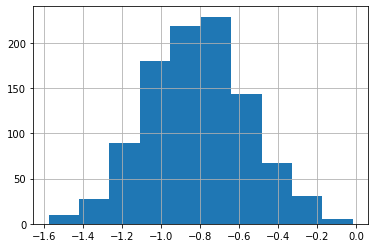

In [21]:
boot_7d['diffs'].hist()

In [22]:
print('there is strong evidence', (boot_7d['diffs'] < 0).sum() / boot_7d['diffs'].count(), 'probability that 7-day retention is higher when the gate is at level 30 than when it is at level 40:')

there is strong evidence 1.0 probability that 7-day retention is higher when the gate is at level 30 than when it is at level 40:


In [23]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [24]:
convert_old = df[(df['retention_1'] == 1)& (df['version'] == 'gate_30')].shape[0]
convert_new = df[(df['retention_1'] == 1)& (df['version'] == 'gate_40')].shape[0]
n_old = df[df['version']=='gate_30'].shape[0]
n_new = df[df['version']=='gate_40'].shape[0]
convert_old, convert_new, n_old, n_new

(20034, 20119, 44700, 45489)

In [25]:
stat, p_value = proportions_ztest([convert_new,convert_old] ,[n_new, n_old], alternative = 'larger')
stat, p_value

(-1.7840862247974725, 0.9627951723515404)

>> **From our analysis, we see that moving the first gate in Cookie Cats from level 30 to level 40 is not a good decision at all.**